In [6]:
%pip install pandas
%pip  install numpy
%pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 10.6/10.6 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 KB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

# Load CSV file
data = pd.read_csv("train.csv")

# Define paths to image folders
data_dir = "colored_images"
class_folders = {
    0: "No_DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Proliferate_DR"
}

# Prepare data for training
def preprocess_data(data, data_dir, class_folders, validation_split=0.2):
    file_paths = []
    labels = []

    for index, row in data.iterrows():
        file_name = row['id_code']
        label = row['diagnosis']
        class_folder = class_folders[label]
        file_path = os.path.join(data_dir, class_folder, file_name)
        file_paths.append(file_path)
        labels.append(label)

    # Split dataset into train and validation sets
    train_files, valid_files, train_labels, valid_labels = train_test_split(
        file_paths, labels, test_size=validation_split, random_state=random_seed)
    
    return train_files, valid_files, train_labels, valid_labels

train_files, valid_files, train_labels, valid_labels = preprocess_data(data, data_dir, class_folders)

# Print number of samples in train and validation sets
print("Number of samples in train set:", len(train_files))
print("Number of samples in validation set:", len(valid_files))
print(train_files)

Number of samples in train set: 2929
Number of samples in validation set: 733
['colored_images\\No_DR\\996f9bba4ef0', 'colored_images\\No_DR\\286e9981dd9b', 'colored_images\\No_DR\\eae70f527755', 'colored_images\\Severe\\19244004583f', 'colored_images\\No_DR\\7f0ffeb0a333', 'colored_images\\Severe\\b960142a8de7', 'colored_images\\Moderate\\302bcdb635ff', 'colored_images\\No_DR\\8191ae701985', 'colored_images\\Proliferate_DR\\c0e509786f7f', 'colored_images\\No_DR\\ed648b9bcd95', 'colored_images\\No_DR\\aabd867043cf', 'colored_images\\Mild\\67f5d89da548', 'colored_images\\No_DR\\a5bb85afc6e8', 'colored_images\\Proliferate_DR\\b99afe7137fb', 'colored_images\\No_DR\\80c67efc8101', 'colored_images\\No_DR\\aafe980edd0c', 'colored_images\\No_DR\\6d10709053ae', 'colored_images\\No_DR\\28f73575e1f2', 'colored_images\\No_DR\\4c60f6fcea75', 'colored_images\\No_DR\\80b5697f2a5e', 'colored_images\\No_DR\\cb0cc98d7e35', 'colored_images\\No_DR\\a1eb88562239', 'colored_images\\Proliferate_DR\\25d06908

In [8]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 7.6/7.6 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 181.9/181.9 KB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 KB 1.4 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 KB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.8 MB/s eta 0:00:00


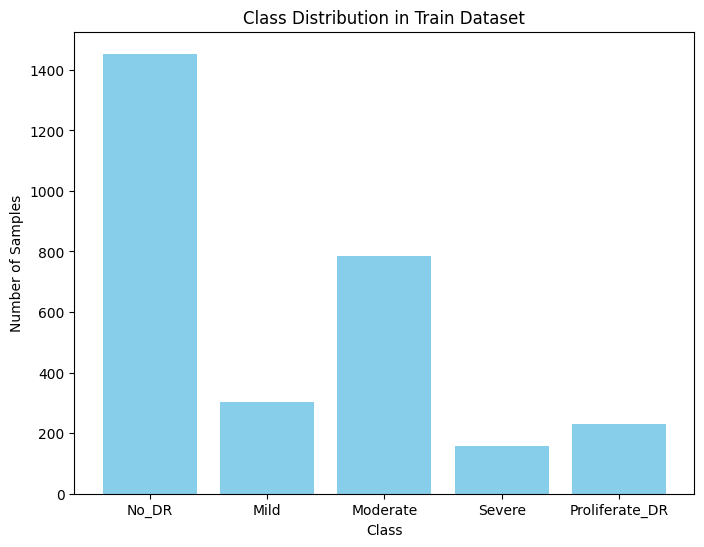

In [3]:
import matplotlib.pyplot as plt

# Count occurrences of each class in train_labels
class_counts = {class_name: train_labels.count(class_code) for class_code, class_name in class_folders.items()}

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


In [11]:
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 38.6/38.6 MB 6.6 MB/s eta 0:00:00


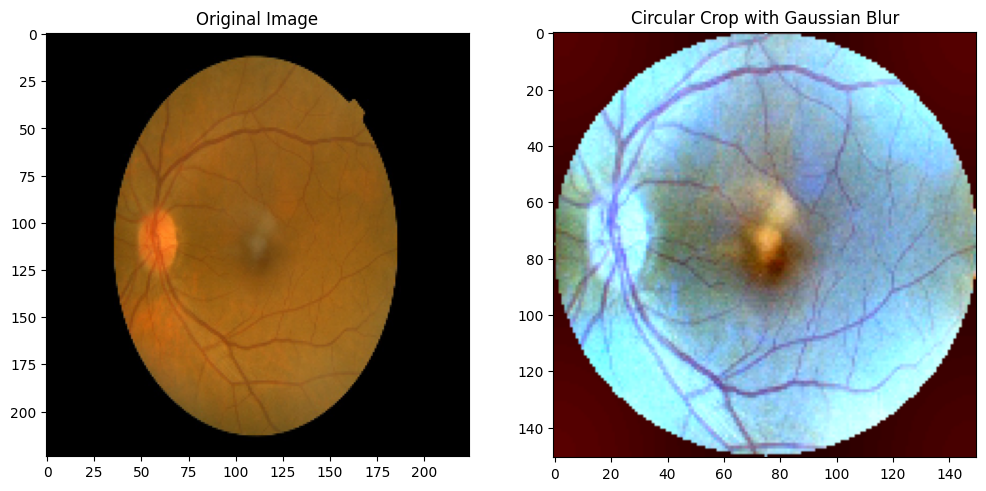

In [8]:
import cv2

def crop_image_from_gray(img, tol=7):
    """
    Crop the image based on its intensity
    """
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1), mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol

        check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if check_shape == 0:
            return img  # return original image
        else:
            img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
            img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
            img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
            img = np.stack([img1, img2, img3], axis=-1)
        return img

def circle_crop(img, sigmaX):
    """
    Create circular crop around image center
    """
    img = crop_image_from_gray(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, _ = img.shape
    x = int(width / 2)
    y = int(height / 2)
    r = np.amin((x, y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x, y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), sigmaX), -4, 128)
    return img

# Load a random image from the dataset
random_index = np.random.randint(len(train_files))
image_path = train_files[random_index] + ".png"  # Add file extension
image = cv2.imread(image_path)

# Apply circular crop with Gaussian blur
sigmaX = 30  # Adjust this value as needed
cropped_image = circle_crop(image, sigmaX)

# Plot the original and cropped images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Circular Crop with Gaussian Blur')
plt.show()


In [9]:
import cv2
import os

# Define the output directory for the processed images
output_dir = "processed_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to process all images in the dataset
def process_images(input_files, output_dir, sigmaX=30):
    for input_file in input_files:
        image = cv2.imread(input_file + ".png")  # Assuming images have .png extension
        if image is None:
            print(f"Error: Unable to load image at path '{input_file}'")
            continue
        
        # Apply circular crop with Gaussian blur
        cropped_image = circle_crop(image, sigmaX)
        
        # Save processed image to output directory
        output_file = os.path.join(output_dir, os.path.basename(input_file) + ".png")
        cv2.imwrite(output_file, cropped_image)

# Process all images in the dataset
process_images(train_files, output_dir)

print("Processing completed. Processed images are saved in the 'processed_images' folder.")


Processing completed. Processed images are saved in the 'processed_images' folder.


In [11]:
process_images(valid_files, output_dir)

In [12]:
import shutil

# Function to replace original dataset with processed images
def replace_dataset(original_files, processed_dir):
    for original_file in original_files:
        processed_file = os.path.join(processed_dir, os.path.basename(original_file) + ".png")
        if os.path.exists(processed_file):
            # Replace original file with processed file
            shutil.copyfile(processed_file, original_file)
        else:
            print(f"Error: Processed image not found for '{original_file}'")

# Replace train dataset with processed images
replace_dataset(train_files, output_dir)

# Replace validation dataset with processed images
replace_dataset(valid_files, output_dir)

print("Dataset replacement completed.")


Dataset replacement completed.


C:\Users\Devesh\AppData\Local\Temp\ipykernel_61676\154850790.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=all_labels, cmap=plt.cm.get_cmap("viridis", 5), alpha=0.5)
C:\Users\Devesh\AppData\Local\Temp\ipykernel_61676\154850790.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(tsne_results[:,0], tsne_results[:,1], c=all_labels, cmap=plt.cm.get_cmap("viridis", 5), alpha=0.5)
C:\Users\Devesh\AppData\Local\Temp\ipykernel_61676\154850790.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use `

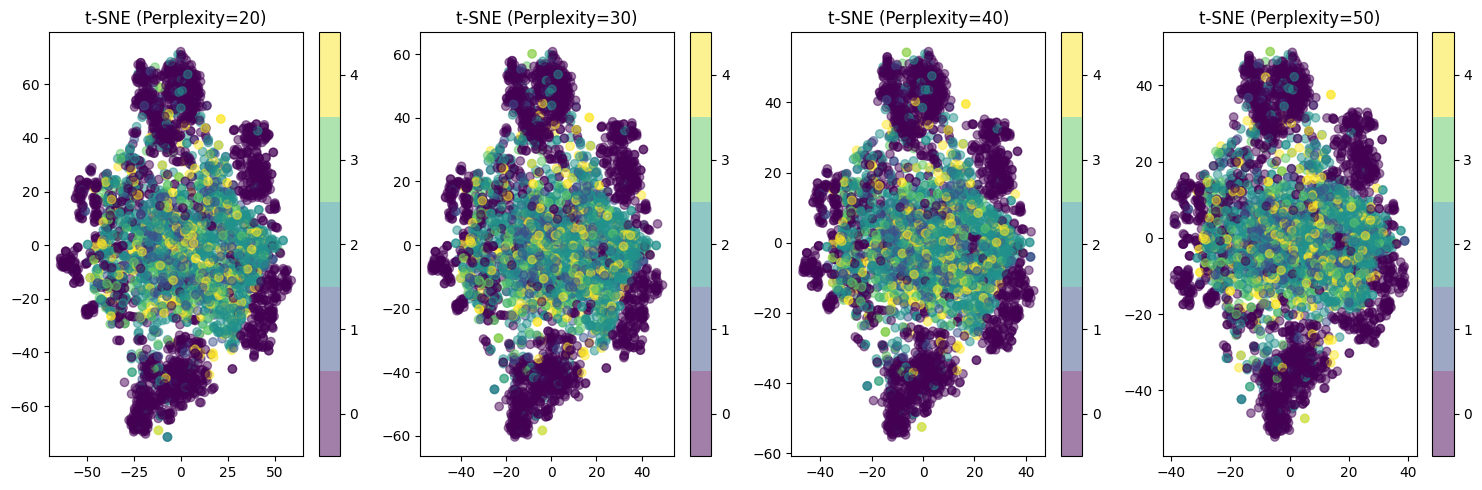

In [13]:
from sklearn.manifold import TSNE


# Function to preprocess images: flatten to 1D grayscale
def preprocess_images(image_paths):
    grayscale_images = []
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))  # Resize images to a consistent size if necessary
        flattened_image = image.flatten()
        grayscale_images.append(flattened_image)
    return np.array(grayscale_images)

# Preprocess train and validation images
train_images = preprocess_images(train_files)
valid_images = preprocess_images(valid_files)

# Concatenate train and validation images and labels
all_images = np.concatenate((train_images, valid_images), axis=0)
all_labels = np.concatenate((train_labels, valid_labels), axis=0)

# Define perplexity values to visualize
perplexities = [20, 30, 40, 50]

# Visualize t-SNE for each perplexity value
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(all_images)
    
    plt.subplot(1, len(perplexities), i+1)
    plt.scatter(tsne_results[:,0], tsne_results[:,1], c=all_labels, cmap=plt.cm.get_cmap("viridis", 5), alpha=0.5)
    plt.title(f"t-SNE (Perplexity={perplexity})")
    plt.colorbar(ticks=range(5))
    plt.clim(-0.5, 4.5)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Rename valid_files to test_files and valid_labels to test_labels
test_files = valid_files
test_labels = valid_labels

# Split train set into train and validation sets
train_files, valid_files, train_labels, valid_labels = train_test_split(
    train_files, train_labels, test_size=0.2, random_state=42)

# Now train_files, valid_files, and test_files contain file paths for train, validation, and test sets respectively
# train_labels, valid_labels, and test_labels contain corresponding labels


In [17]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     -------------------------------------- 376.9/376.9 MB 3.6 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 7.2 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 26.4/26.4 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 127.7/127.7 KB 3.8 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 KB 6.5 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 62.6/62.6 KB 1.7 MB/s eta 0:00:00
     ---------------------

You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [19]:
%pip install keras

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

In [28]:
# Define parameters
batch_size = 32
epochs = 10
input_shape = (224, 224, 3)  # Assuming images are resized to 224x224 for ResNet50

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)  # Assuming 5 classes
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation for validation and test images (only rescaling)
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Convert lists to DataFrames
train_df = pd.DataFrame({'file_paths': train_files, 'labels': [str(label) for label in train_labels]})
valid_df = pd.DataFrame({'file_paths': valid_files, 'labels': [str(label) for label in valid_labels]})
test_df = pd.DataFrame({'file_paths': test_files, 'labels': [str(label) for label in test_labels]})

# Define train, validation, and test generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="file_paths",
    y_col="labels",
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col="file_paths",
    y_col="labels",
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = valid_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="file_paths",
    y_col="labels",
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\Devesh\AppData\Roaming\Python\Python39\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1874 invalid image filename(s) in x_col="file_paths". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Devesh\AppData\Roaming\Python\Python39\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 469 invalid image filename(s) in x_col="file_paths". These filename(s) will be ignored.
  warnings.warn(
C:\Users\Devesh\AppData\Roaming\Python\Python39\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 586 invalid image filename(s) in x_col="file_paths". These filename(s) will be ignored.
  warnings.warn(


ValueError: Must provide at least one structure